# Human as a model


Then the comparison between the true and predicted results is conducted.
The same can be done for the abortion posts. Data comes from three psychologists.

## Load the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
path_to_human_assessed_A = '../data/raw/human_as_model_abortion_A.csv'
path_to_human_assessed_B = '../data/raw/human_as_model_abortion_B.csv'
path_to_human_assessed_C = '../data/raw/human_as_model_abortion_C.csv'

path_to_test = '../data/split/test.csv'

In [3]:
# load the human assessed data
human_data_A = pd.read_csv(path_to_human_assessed_A)
human_data_B = pd.read_csv(path_to_human_assessed_B)
human_data_C = pd.read_csv(path_to_human_assessed_C)
human_data_A.head()

,post_abortion,adm,riv
0,I'm stunned. To think I've lived 40 years in w...,2.7,1.8
1,Deeply saddened by the @government's decision ...,2.9,1.9
2,I cannot believe this government. They have ab...,3.5,3.0
3,As a woman I do not feel safe anymore living i...,2.7,1.8
4,Every person should have the opportunity to ma...,2.1,1.3


In [6]:
# load the test data
test_data = pd.read_csv(path_to_test)
test_data[['post_abortion','adm','riv']].head()

,post_abortion,adm,riv
0,"In this day and age, removing a woman's right ...",1.667,1.333
1,Can't believe the decision that this governmen...,3.000,2.000
2,Women should have free choice over what they d...,3.111,1.556
3,Welcome to Gilliead...,2.222,4.000
4,horrific circumstances that abortion is fully ...,2.889,1.222


In [7]:
# drop not needed columns
test_data = test_data[['post_abortion','adm','riv']]

In [8]:
# Merge the two dataframes
merged_data = test_data.merge(human_data_A, on='post_abortion', suffixes=('', '_human_A')) \
                  .merge(human_data_B, on='post_abortion', suffixes=('', '_human_B')) \
                  .merge(human_data_C, on='post_abortion', suffixes=('', '_human_C'))
merged_data.rename(columns={'adm': 'adm_original', 'riv': 'riv_original'}, inplace=True)
# Check the length of the merged data
print(f"Merged correctly: {len(merged_data)==len(human_data_A)==len(human_data_B)==len(human_data_C)==len(test_data)}")
merged_data.head()

Merged correctly: True


,post_abortion,adm_original,riv_original,adm_human_A,riv_human_A,adm_human_B,riv_human_B,adm_human_C,riv_human_C
0,"In this day and age, removing a woman's right ...",1.667,1.333,3.0,2.1,2.9,1.8,2.2,1.5
1,Can't believe the decision that this governmen...,3.000,2.000,2.6,2.1,3.5,2.1,2.8,1.2
2,Women should have free choice over what they d...,3.111,1.556,2.7,2.1,2.0,1.5,1.2,1.3
3,Welcome to Gilliead...,2.222,4.000,3.1,2.7,3.0,1.6,3.3,1.5
4,horrific circumstances that abortion is fully ...,2.889,1.222,2.4,1.5,2.4,2.2,3.2,3.1


# Mean squared error for the human assessed data

In [11]:
# Calculate the mean squared error
mse_adm_A = mean_squared_error(merged_data['adm_human_A'], merged_data['adm_original'])
mse_riv_A = mean_squared_error(merged_data['riv_human_A'], merged_data['riv_original'])
mse_adm_B = mean_squared_error(merged_data['adm_human_B'], merged_data['adm_original'])
mse_riv_B = mean_squared_error(merged_data['riv_human_B'], merged_data['riv_original'])
mse_adm_C = mean_squared_error(merged_data['adm_human_C'], merged_data['adm_original'])
mse_riv_C = mean_squared_error(merged_data['riv_human_C'], merged_data['riv_original'])
print(f"Mean Squared Error for adm: A:{mse_adm_A}, B:{mse_adm_B}, C:{mse_adm_C}, mean: {np.mean([mse_adm_A,mse_adm_B,mse_adm_C])}")
print(f"Mean Squared Error for riv: A:{mse_riv_A}, B:{mse_riv_B}, C:{mse_riv_C}, mean: {np.mean([mse_riv_A,mse_riv_B,mse_riv_C])}")

Mean Squared Error for adm: A:0.4952727391304348, B:0.8284770869565216, C:0.7401944782608696, mean: 0.6879814347826088
Mean Squared Error for riv: A:0.918276347826087, B:1.138372, C:1.519393739130435, mean: 1.1920140289855075


# Other metrics

In [12]:
# other metrics
# Calculate the mean absolute error
mae_adm_A = mean_absolute_error(merged_data['adm_human_A'], merged_data['adm_original'])
mae_riv_A = mean_absolute_error(merged_data['riv_human_A'], merged_data['riv_original'])
mae_adm_B = mean_absolute_error(merged_data['adm_human_B'], merged_data['adm_original'])
mae_riv_B = mean_absolute_error(merged_data['riv_human_B'], merged_data['riv_original'])
mae_adm_C = mean_absolute_error(merged_data['adm_human_C'], merged_data['adm_original'])
mae_riv_C = mean_absolute_error(merged_data['riv_human_C'], merged_data['riv_original'])

print(f"Mean Absolute Error for adm: A:{mae_adm_A}, B:{mae_adm_B}, C:{mae_adm_C}")
print(f"Mean Absolute Error for riv: A:{mae_riv_A}, B:{mae_riv_B}, C:{mae_riv_C}")

Mean Absolute Error for adm: A:0.6111304347826088, B:0.7183043478260869, C:0.6855217391304348
Mean Absolute Error for riv: A:0.7973478260869566, B:0.8355652173913043, C:0.9837826086956519


### Distribution

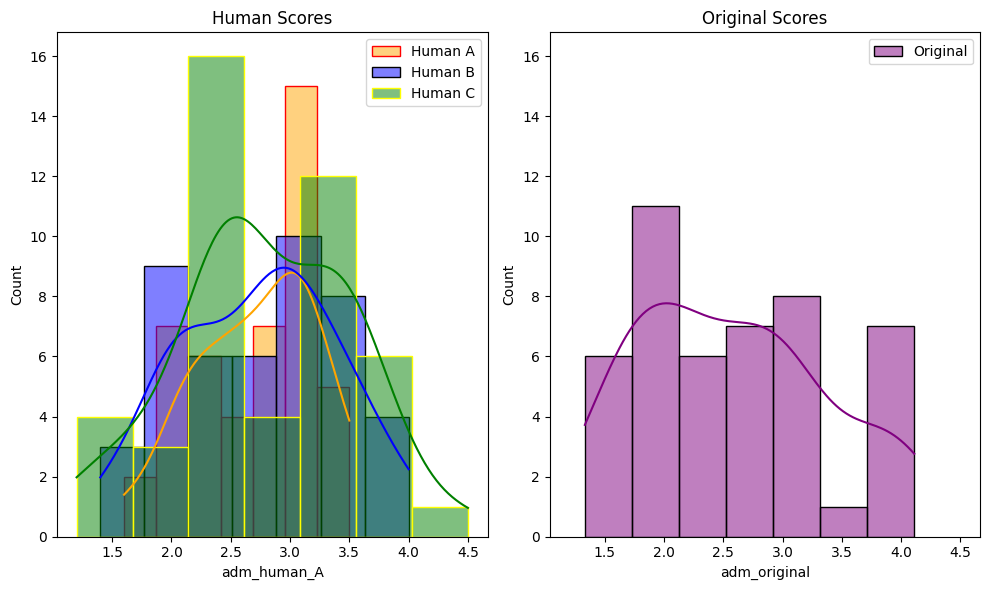

In [13]:
plt.figure(figsize=(10, 6))
"""ax1 = plt.subplot(1, 2, 1)
sns.histplot(merged_data[['adm_human']],x = 'adm_human', color='orange', edgecolor='red', kde=True)
plt.title('Human scores')
ax2 = plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
sns.histplot(merged_data[['adm_original']],x = 'adm_original', kde=True)
plt.title('True scores')
plt.show()"""

ax1 = plt.subplot(1, 2, 1)
sns.histplot(merged_data['adm_human_A'], color='orange', edgecolor='red', kde=True, label='Human A')
sns.histplot(merged_data['adm_human_B'], color='blue', edgecolor='black', kde=True, label='Human B')
sns.histplot(merged_data['adm_human_C'], color='green', edgecolor='yellow', kde=True, label='Human C')
plt.title('Human Scores')
plt.legend()

# Plot for original data
ax2 = plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
sns.histplot(merged_data['adm_original'], kde=True, color='purple', label='Original')
plt.title('Original Scores')
plt.legend()

plt.tight_layout()
plt.show()

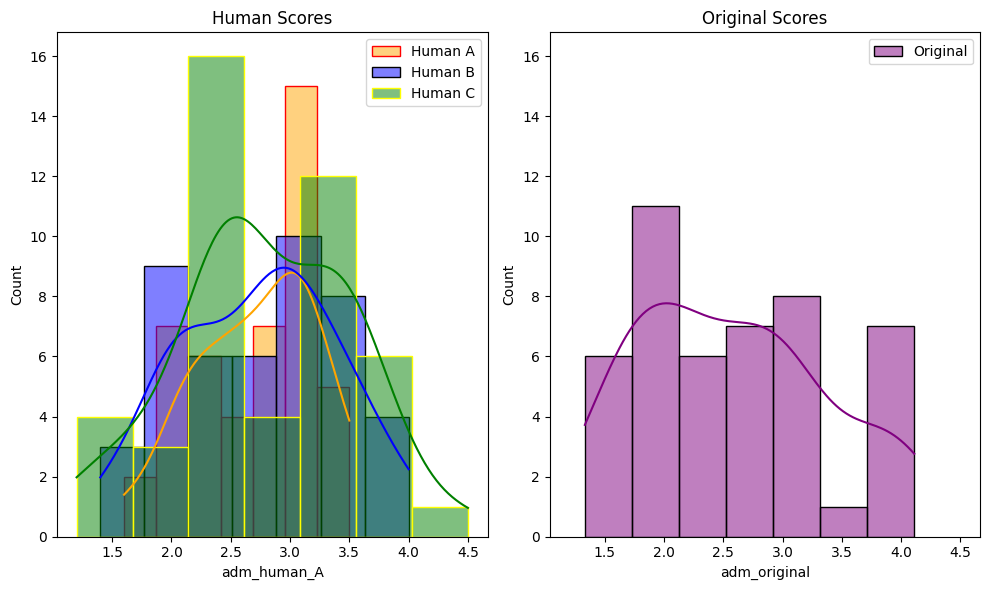

In [14]:
# Define variables for plotting
colors = ['orange', 'blue', 'green']
edgecolors = ['red', 'black', 'yellow']
labels = ['Human A', 'Human B', 'Human C']

# Plotting the histograms
plt.figure(figsize=(10, 6))

ax1 = plt.subplot(1, 2, 1)
for i, suffix in enumerate(['_human_A', '_human_B', '_human_C']):
    sns.histplot(merged_data[f'adm{suffix}'], color=colors[i], edgecolor=edgecolors[i], kde=True, label=labels[i])
plt.title('Human Scores')
plt.legend()

# Plot for original data
ax2 = plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
sns.histplot(merged_data['adm_original'], kde=True, color='purple', label='Original')
plt.title('Original Scores')
plt.legend()

plt.tight_layout()
plt.show()

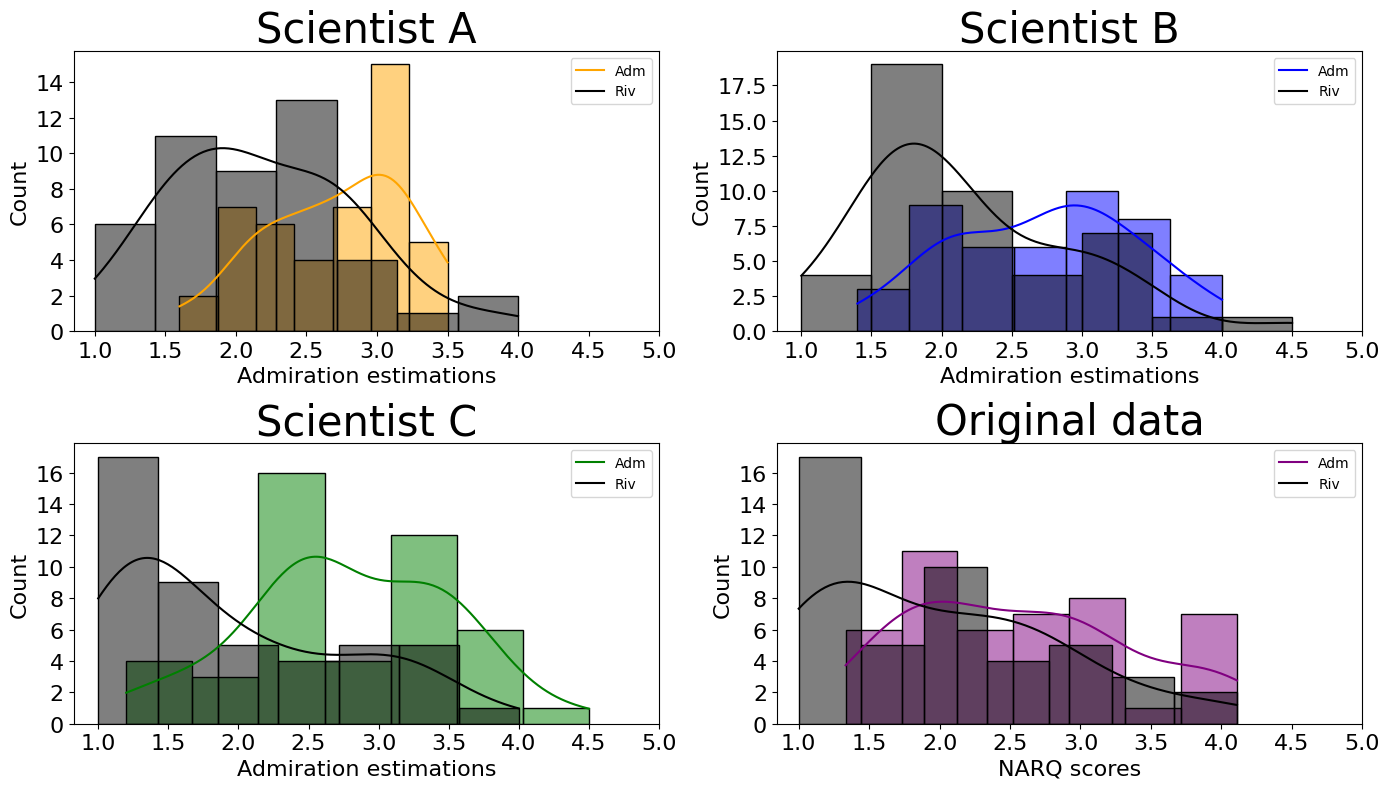

In [15]:
# Plotting histograms grouped together
plt.figure(figsize=(14, 8))

colors = ['orange', 'blue', 'green', 'purple']
labels = ['Scientist A', 'Scientist B', 'Scientist C', 'Original data']
columns = ['adm_human_A', 'adm_human_B', 'adm_human_C', 'adm_original']
columns_r = ['riv_human_A', 'riv_human_B', 'riv_human_C', 'riv_original']
xlabels = ['Admiration estimations','Admiration estimations','Admiration estimations','NARQ scores']
for i, column in enumerate(columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(merged_data[column], color=colors[i], kde=True)
    sns.histplot(merged_data[columns_r[i]], color='black', kde=True)

    plt.title(labels[i],fontsize=30)
    plt.xlabel(xlabels[i], fontsize=16)
    plt.ylabel('Count',fontsize=16)
    plt.yticks(fontsize=16)
    plt.xticks(np.arange(1.0, 5.5, 0.5),fontsize=16)
    plt.legend(["Adm","Riv"])



plt.tight_layout()
plt.show()

Val/MSE	Test/MSE	Second_Test/MSE
0.873661	1.394292	1.350694
1.351418	1.211501	1.775061
1.450036	1.154834	1.376452
1.261327	1.010549	1.795675
1.360076	0.716525	1.243888

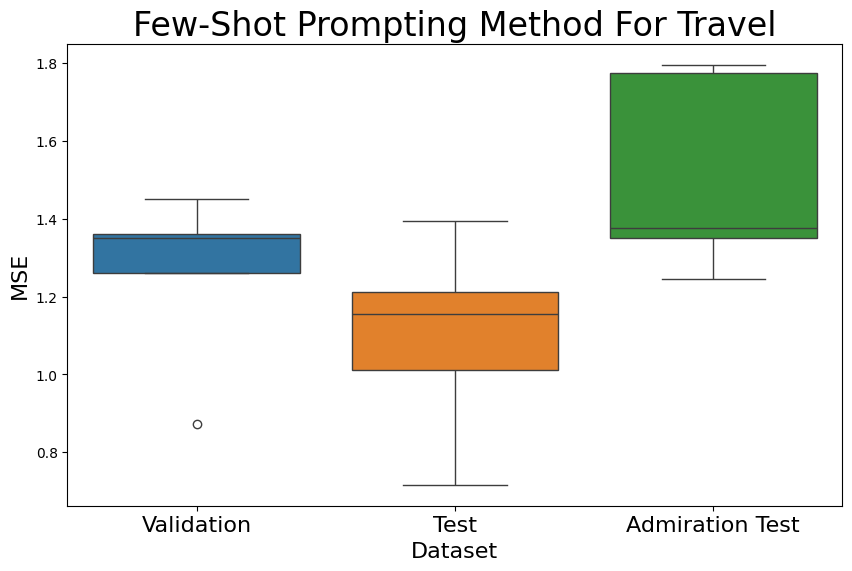

In [29]:
# Data from the provided results
data = {
    'Val/MSE': [0.873661, 1.351418, 1.450036, 1.261327, 1.360076],
    'Test/MSE': [1.394292, 1.211501, 1.154834, 1.010549, 0.716525],
    'Second_Test/MSE': [1.350694, 1.775061, 1.376452, 1.795675, 1.243888]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Few-Shot Prompting Method For Travel',fontsize=24)
plt.ylabel('MSE',fontsize=16)
plt.xlabel('Dataset',fontsize=16)
plt.xticks(ticks=range(3), labels=['Validation', 'Test', 'Abortion Post Test'],fontsize=16)
plt.show()